In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
# print the Saint Paul json make sure I connect
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "saint paul").json()
response

{'coord': {'lon': -93.09, 'lat': 44.94},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 28.54,
  'feels_like': 18.03,
  'temp_min': 25,
  'temp_max': 30.99,
  'pressure': 1016,
  'humidity': 39},
 'visibility': 16093,
 'wind': {'speed': 8.05, 'deg': 210},
 'clouds': {'all': 20},
 'dt': 1580931966,
 'sys': {'type': 1,
  'id': 3291,
  'country': 'US',
  'sunrise': 1580909267,
  'sunset': 1580945093},
 'timezone': -21600,
 'id': 5045360,
 'name': 'Saint Paul',
 'cod': 200}

Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_lng_list = []
#loop_count = 0

#while len(cities) < 10:
    #loop_count +=1

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add a one second interval between queries to stay within API query limits
time.sleep(1)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)
        lat_lng_list.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)

652

Perform API Calls Perform a weather check on each city using a series of successive API calls. Include a print log of each city as it's being processed (with the city number and city name).

In [14]:
# set the base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_info = []
i = 1
set_number = 1

print("Beginning Data Retrieval") 
print("--------------------------------")

for j, city in enumerate(cities):
    
    if (j % 50 == 0 and j >= 50):
        set_number = set_number + 1
        i = 0
    print(f"Processing Record {i} of Set {set_number} | {city}")
    i += 1
   
    response = requests.get(query_url + city).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    try:
        lat = response['coord']['lat']
        name = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lngs = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        city_info.append({"City": name,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": lat,
                          "Lng": lngs,
                          "Max Temp": max_temp,
                          "Wind Speed": wind_speed})
    except:
        print("Weather data error. Skip city.")
        pass

print("------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | kousseri
Processing Record 2 of Set 1 | kathmandu
Processing Record 3 of Set 1 | san ramon
Processing Record 4 of Set 1 | lasa
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | hami
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | port blair
Processing Record 16 of Set 1 | chifeng
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | rio gallegos
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | mys shmidta
City not found. Skip variable.
Processing Record 22 of Set 1 | mount isa
Processing Record 23 of

Processing Record 34 of Set 4 | geraldton
Processing Record 35 of Set 4 | limon
Processing Record 36 of Set 4 | isangel
Processing Record 37 of Set 4 | boa vista
Processing Record 38 of Set 4 | bilibino
Processing Record 39 of Set 4 | tarakan
Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | plavinas
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | umtata
Processing Record 44 of Set 4 | grand river south east
City not found. Skip variable.
Processing Record 45 of Set 4 | suntar
Processing Record 46 of Set 4 | thatta
Processing Record 47 of Set 4 | zeulenroda
Processing Record 48 of Set 4 | ahipara
Processing Record 49 of Set 4 | padre bernardo
Processing Record 0 of Set 5 | salalah
Processing Record 1 of Set 5 | cunha
Processing Record 2 of Set 5 | port keats
Processing Record 3 of Set 5 | businga
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | moose factory
Processing Record 6 of Set 5 | guanica
Processing Record 7 o

Processing Record 20 of Set 8 | sur
Processing Record 21 of Set 8 | khonuu
City not found. Skip variable.
Processing Record 22 of Set 8 | kaita
Processing Record 23 of Set 8 | tucupita
Processing Record 24 of Set 8 | mancio lima
Processing Record 25 of Set 8 | samusu
City not found. Skip variable.
Processing Record 26 of Set 8 | husainabad
Processing Record 27 of Set 8 | capao bonito
Processing Record 28 of Set 8 | mae tha
Processing Record 29 of Set 8 | tabou
Processing Record 30 of Set 8 | terrace
Processing Record 31 of Set 8 | vizinga
Processing Record 32 of Set 8 | palasa
Processing Record 33 of Set 8 | najran
Processing Record 34 of Set 8 | ciudad bolivar
Processing Record 35 of Set 8 | resistencia
Processing Record 36 of Set 8 | jubayl
City not found. Skip variable.
Processing Record 37 of Set 8 | hanna
Processing Record 38 of Set 8 | aksarka
Processing Record 39 of Set 8 | valdivia
Processing Record 40 of Set 8 | dori
Processing Record 41 of Set 8 | trudarmeyskiy
Processing Rec

Processing Record 9 of Set 12 | mineros
Processing Record 10 of Set 12 | peniche
Processing Record 11 of Set 12 | bud
Processing Record 12 of Set 12 | tambun
Processing Record 13 of Set 12 | gizo
Processing Record 14 of Set 12 | moose jaw
Processing Record 15 of Set 12 | opuwo
Processing Record 16 of Set 12 | camocim
Processing Record 17 of Set 12 | srednekolymsk
Processing Record 18 of Set 12 | sweetwater
Processing Record 19 of Set 12 | oga
Processing Record 20 of Set 12 | leh
Processing Record 21 of Set 12 | batagay-alyta
Processing Record 22 of Set 12 | nizwa
Processing Record 23 of Set 12 | mayumba
Processing Record 24 of Set 12 | manzhouli
Processing Record 25 of Set 12 | mackay
Processing Record 26 of Set 12 | dire
Processing Record 27 of Set 12 | kurumkan
Processing Record 28 of Set 12 | inhambane
Processing Record 29 of Set 12 | viransehir
Processing Record 30 of Set 12 | glenwood springs
Processing Record 31 of Set 12 | kamina
Processing Record 32 of Set 12 | lethem
Processin

Convert Raw Data to DataFrame Export the city data into a .csv. Display the DataFrame

In [16]:
# Export data to the .csv then display data frame
weather_data_df = pd.DataFrame(city_info)

weather_data_df.to_csv('cities.csv', encoding="utf-8", index_label="City_ID")

weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kousseri,72,CM,1580932050,14,12.08,15.03,75.20,5.82
1,Kathmandu,20,NP,1580931800,87,27.72,85.32,44.60,3.36
2,San Ramon,40,US,1580932025,50,37.78,-121.98,61.00,3.78
3,Laas,68,IT,1580932054,61,46.62,10.70,46.40,8.05
4,Qaanaaq,0,GL,1580932055,43,77.48,-69.36,-19.95,4.18


# Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

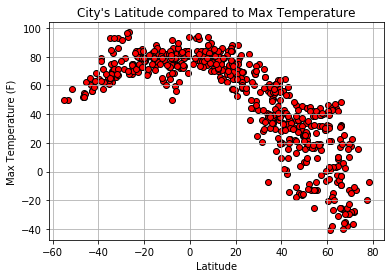

In [27]:
x_values = weather_data_df["Lat"]
y_values = weather_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black", color="red")
plt.title("City's Latitude compared to Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save scatter plot 
plt.savefig("Temp_to_Latitude.png")

#### After compiling the max temperature for the random cities, this code plotted the latitude to the respective max temperature. The temperature representation is inline with what I would expect as you move away from the equator either north or south.

### Latitude vs. Humidity Plot

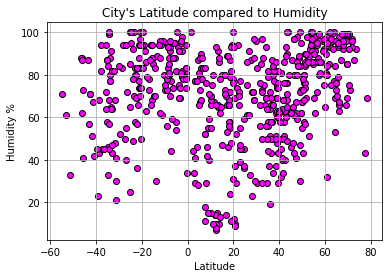

In [33]:
x_values = weather_data_df["Lat"]
y_values = weather_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black", color="magenta")
plt.title("City's Latitude compared to Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

# Save scatter plot 
plt.savefig("Temp_to_Humidity.png")

#### After compiling the humidity for the random cities, this code plotted the latitude to the respective humidity. I previously hadn't contemplated that the humidity percentage would be high near the poles.

### Latitude vs. Cloudiness Plot

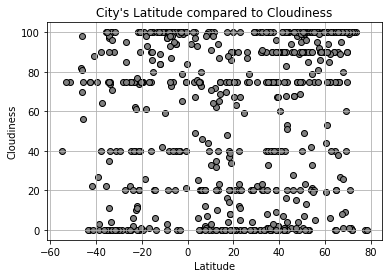

In [30]:
x_values = weather_data_df["Lat"]
y_values = weather_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black", color="gray")
plt.title("City's Latitude compared to Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save scatter plot 
plt.savefig("Temp_to_Cloudines.png")

#### After compiling the cloudiness for the random cities, this plotted the coludiness by latitude. There doesn't appear to be a correlation between laitude and cloudiness - clouds happen.

### Latitude vs. Wind Speed Plot

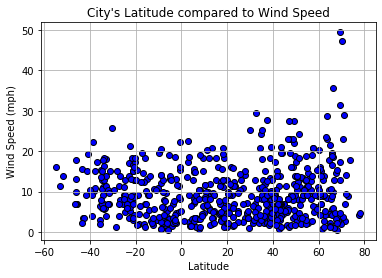

In [34]:
x_values = weather_data_df["Lat"]
y_values = weather_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black", color="blue")
plt.title("City's Latitude compared to Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save scatter plot
plt.savefig("Temp_to_Wind_Speed.png")

#### After compiling the top wind speeds for the random cities, this plotted the city's top wind speed by it's latitude. I think this really only shows that most places experience wind up to 20 mph regardless of latitude.

# Perform linear regressions on the above scatter plots, organized by hemisphere


### Create Northern and Southern Hemisphere DataFrames

In [35]:
# Northern hemisphere

# Determine if city is north or south of prime meridian 
northern_hem = weather_data_df["Lat"] >= 0

# Determine where the latitude values are greater than or equal to 0
northern_df = weather_data_df.loc[weather_data_df["Lat"] >= 0, :].reset_index()

# Reset the dataframe without the index
northern_df = northern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kousseri,72,CM,1580932050,14,12.08,15.03,75.20,5.82
1,Kathmandu,20,NP,1580931800,87,27.72,85.32,44.60,3.36
2,San Ramon,40,US,1580932025,50,37.78,-121.98,61.00,3.78
3,Laas,68,IT,1580932054,61,46.62,10.70,46.40,8.05
4,Qaanaaq,0,GL,1580932055,43,77.48,-69.36,-19.95,4.18


In [38]:
# Souther hemisphere

# Determine if city is north or south of prime meridian 
southern_hem = weather_data_df["Lat"] < 0

# Determine where the latitude values are less than 0
southern_df = weather_data_df.loc[weather_data_df["Lat"] < 0, :].reset_index()

# Reset the dataframe without the index
southern_df = southern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint-Philippe,20,RE,1580932059,83,-21.36,55.77,78.80,14.99
1,Atuona,100,PF,1580932062,73,-9.80,-139.03,82.18,19.57
2,Hobart,75,AU,1580932065,71,-42.88,147.33,55.99,3.36
3,Kruisfontein,74,ZA,1580932072,80,-34.00,24.73,65.30,6.08
4,Rio Gallegos,75,AR,1580931788,33,-51.62,-69.22,57.20,13.87


### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

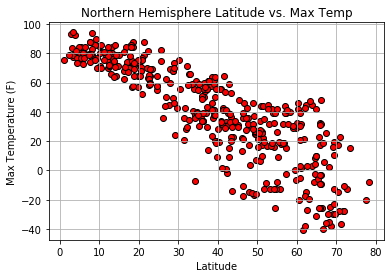

In [40]:
# Create a scatter plot
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black", color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere Latitude vs. Max Temp")
plt.grid()

In [44]:
# Perform a linear regression on latitude vs max temperature (recipe)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      77.073044
1      55.116351
2      40.993312
3      28.583007
4     -14.740750
         ...    
404    56.225417
405    73.942390
406    83.460701
407    83.165886
408    23.318455
Name: Lat, Length: 409, dtype: float64


In [45]:
# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.4x +94.03


The r-squared is: 0.7218372461941033


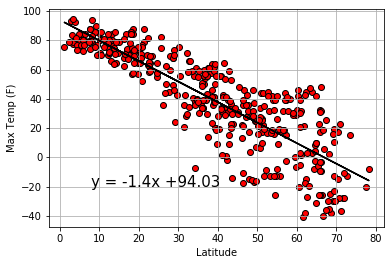

In [50]:
# Create plot
plt.scatter(x_values,y_values, edgecolors="black",color="red")
plt.plot(x_values,regress_values,"r-", color="black")

# Label the plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.annotate(line_eq,(8,-20),fontsize=15)
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

#save plot
#plt.savefig("Northern_Temp_v_Latitude.png"))

#show plot
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

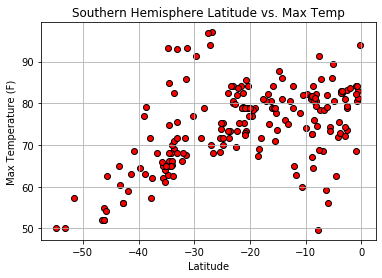

In [51]:
# Create a scatter plot
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black", color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere Latitude vs. Max Temp")
plt.grid()

In [52]:
# Perform a linear regression on latitude vs max temperature (recipe)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      74.328834
1      78.516930
2      66.532311
3      69.749463
4      63.365879
         ...    
189    79.042253
190    70.064657
191    79.886393
192    79.313972
193    74.473751
Name: Lat, Length: 194, dtype: float64


In [69]:
# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.4x +10.85


The r-squared is: 0.04971903616545073


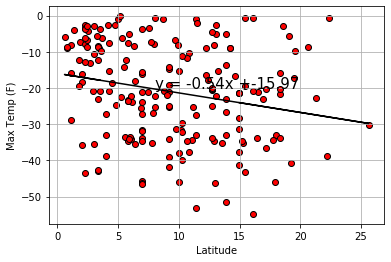

In [107]:
# Create plot
plt.scatter(x_values,y_values, edgecolors="black",color="red")
plt.plot(x_values,regress_values,"r-", color="black")

# Label the plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.annotate(line_eq,(8,-20),fontsize=15)
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

#save plot
plt.savefig("Southern_Temp_Latitude.png")

#show plot
plt.show()

#### The above Northern hemisphere has a strong correlation (r value > 0.72) between max temperature and latitude while the southern hemisphere shows a weak correlation - which leads me to believe I did something worng along the way...

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

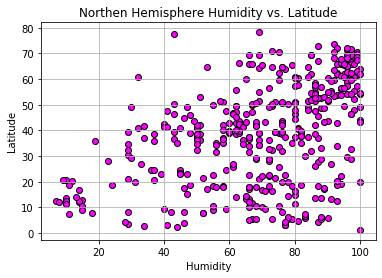

In [55]:
# Create a scatter plot
x_values = northern_df["Humidity"]
y_values = northern_df["Lat"]
plt.scatter(x_values, y_values, edgecolors="black", color="magenta")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Northen Hemisphere Humidity vs. Latitude")
plt.grid()

In [56]:
# Perform a linear regression on latitude vs max temperature (recipe)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      16.413758
1      45.422036
2      30.719210
3      35.090321
4      27.937595
         ...    
404    35.090321
405    41.845673
406    43.832541
407    31.513958
408    41.845673
Name: Humidity, Length: 409, dtype: float64


In [57]:
# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.4x +10.85


The r-squared is: 0.04971903616545073


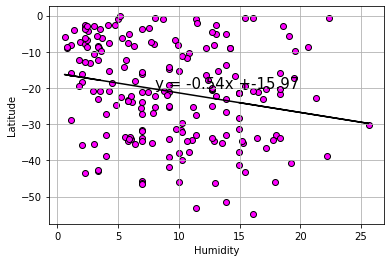

In [105]:
# Create plot
plt.scatter(x_values,y_values, edgecolors="black",color="magenta")
plt.plot(x_values,regress_values,"r-", color="black")

# Label the plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.annotate(line_eq,(8,-20),fontsize=15)
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

#save plot
plt.savefig("Northern_Humidity_Latitude.png")

#show plot
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

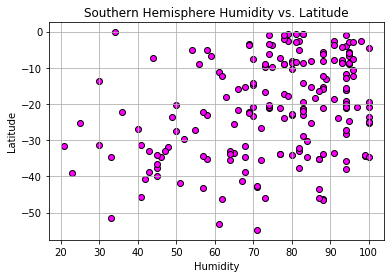

In [72]:
# Create a scatter plot
x_values = southern_df["Humidity"]
y_values = southern_df["Lat"]
plt.scatter(x_values, y_values, edgecolors="black", color="magenta")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Humidity vs. Latitude")
plt.grid()

In [73]:
# Perform a linear regression on latitude vs max temperature (recipe)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -19.242493
1     -21.593385
2     -22.063564
3     -19.947761
4     -30.996956
         ...    
189   -19.712671
190   -27.705706
191   -16.421422
192   -16.186332
193   -16.656511
Name: Humidity, Length: 194, dtype: float64


In [74]:
# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.24x +-38.75


The r-squared is: 0.04971903616545073


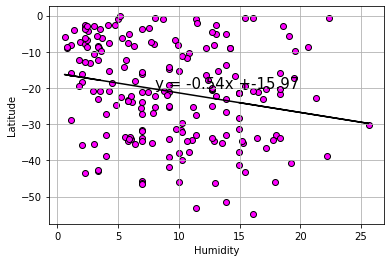

In [103]:
# Create plot
plt.scatter(x_values,y_values, edgecolors="black",color="magenta")
plt.plot(x_values,regress_values,"r-", color="black")

# Label the plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.annotate(line_eq,(8,-20),fontsize=15)
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

#save plot
plt.savefig("Southern_Humidity_Latitude.png")

#show plot
plt.show()

#### The above R values are the same -- something seems wrong

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

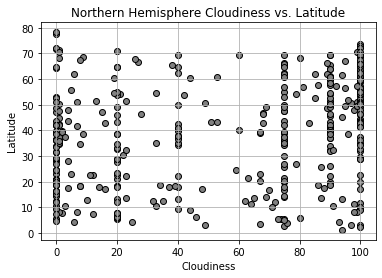

In [77]:
# Create a scatter plot
x_values = northern_df["Cloudiness"]
y_values = northern_df["Lat"]
plt.scatter(x_values, y_values, edgecolors="black", color="gray")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Cloudiness vs. Latitude")
plt.grid()

In [78]:
# Perform a linear regression on latitude vs max temperature (recipe)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      40.723000
1      33.992346
2      36.581059
3      40.205258
4      31.403633
         ...    
404    41.111307
405    41.111307
406    31.403633
407    33.992346
408    44.347199
Name: Cloudiness, Length: 409, dtype: float64


In [79]:
# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.13x +31.4


The r-squared is: 0.04971903616545073


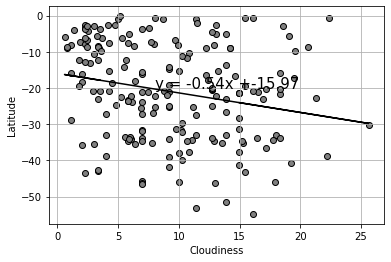

In [99]:
# Create plot
plt.scatter(x_values,y_values, edgecolors="black",color="gray")
plt.plot(x_values,regress_values,"r-", color="black")

# Label the plot and annotate the line equation
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.annotate(line_eq,(8,-20),fontsize=15)
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

#save plot
plt.savefig("Northern_Cloudiness_Latitude.png")

#show plot
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

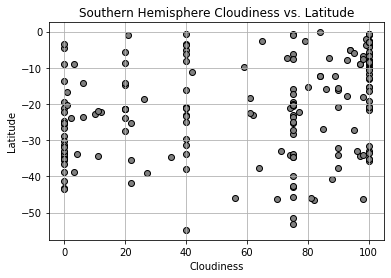

In [82]:
# Create a scatter plot
x_values = southern_df["Cloudiness"]
y_values = southern_df["Lat"]
plt.scatter(x_values, y_values, edgecolors="black", color="gray")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Cloudiness vs. Latitude")
plt.grid()

In [83]:
# Perform a linear regression on latitude vs max temperature (recipe)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -25.028913
1     -16.889989
2     -19.433403
3     -19.535139
4     -19.433403
         ...    
189   -16.889989
190   -17.296935
191   -17.398672
192   -17.093462
193   -16.889989
Name: Cloudiness, Length: 194, dtype: float64


In [84]:
# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.1x +-27.06


The r-squared is: 0.04971903616545073


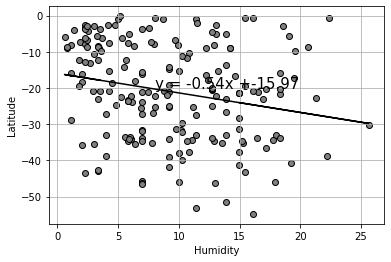

In [108]:
# Create plot
plt.scatter(x_values,y_values, edgecolors="black",color="gray")
plt.plot(x_values,regress_values,"r-", color="black")

# Label the plot and annotate the line equation
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.annotate(line_eq,(8,-20),fontsize=15)
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

#save plot
plt.savefig("Southern_cloudiness_Latitude.png")

#show plot
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

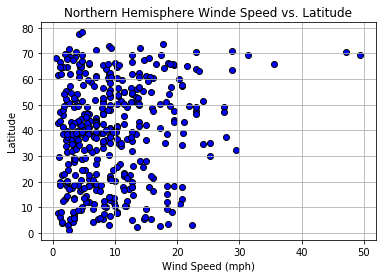

In [86]:
# Create a scatter plot
x_values = northern_df["Wind Speed"]
y_values = northern_df["Lat"]
plt.scatter(x_values, y_values, edgecolors="black", color="blue")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Wind Speed vs. Latitude")
plt.grid()

In [87]:
# Perform a linear regression on latitude vs max temperature (recipe)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      36.837277
1      35.667260
2      35.867019
3      37.897901
4      36.057266
         ...    
404    37.365211
405    35.134570
406    37.974000
407    38.963282
408    40.665989
Name: Wind Speed, Length: 409, dtype: float64


In [88]:
# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.48x +34.07


The r-squared is: 0.04971903616545073


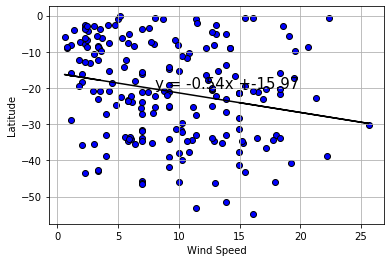

In [109]:
# Create plot
plt.scatter(x_values,y_values, edgecolors="black",color="blue")
plt.plot(x_values,regress_values,"r-", color="black")

# Label the plot and annotate the line equation
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.annotate(line_eq,(8,-20),fontsize=15)
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

#save plot
plt.savefig("Northern_Windspeed_Latitude.png")

#show plot
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

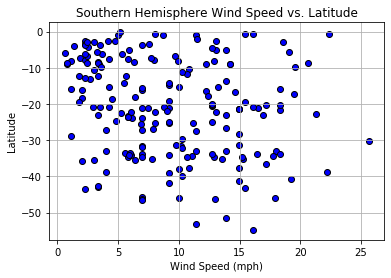

In [90]:
# Create a scatter plot
x_values = southern_df["Wind Speed"]
y_values = southern_df["Lat"]
plt.scatter(x_values, y_values, edgecolors="black", color="blue")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Wind Speed vs. Latitude")
plt.grid()

In [91]:
# Perform a linear regression on latitude vs max temperature (recipe)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -24.059832
1     -26.531807
2     -17.782745
3     -19.250817
4     -23.455332
         ...    
189   -19.364161
190   -18.128173
191   -16.282289
192   -18.241517
193   -17.863705
Name: Wind Speed, Length: 194, dtype: float64


In [92]:
# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.54x +-15.97


The r-squared is: 0.04971903616545073


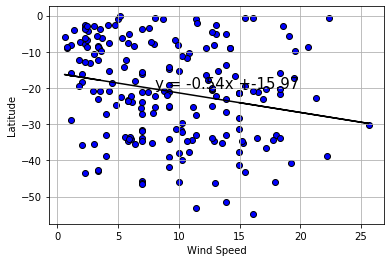

In [93]:
# Create plot
plt.scatter(x_values,y_values, edgecolors="black",color="blue")
plt.plot(x_values,regress_values,"r-", color="black")

# Label the plot and annotate the line equation
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.annotate(line_eq,(8,-20),fontsize=15)
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

#save plot
plt.savefig("Southern_Windspeed_Latitude.png"))

#show plot
plt.show()